
Visualizing the shortest paths graph...


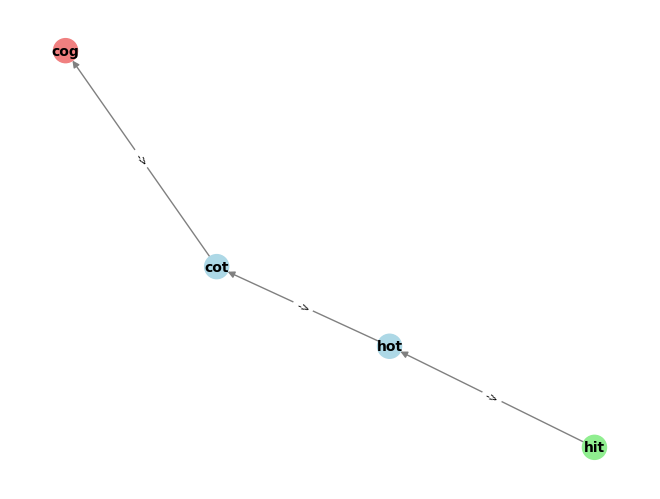

Length of shortest chain is: 4
Shortest paths are:
hit -> hot -> cot -> cog
Time taken for shortest path: 0.00070953369140625 seconds

Length of longest chain is: 15
Longest paths are:
hit -> hip -> hop -> cop -> top -> lop -> log -> dog -> dot -> bot -> hot -> lot -> pot -> cot -> cog
Time taken for longest path: 2.6541924476623535 seconds


In [ ]:
import time
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Function to visualize the word graph with arrows and start/stop markers
def visualize_graph(paths, start, target):
    G = nx.DiGraph()  # Directed graph to show the direction of transformations

    # Add nodes and edges
    for path in paths:
        for i in range(len(path) - 1):
            G.add_edge(path[i], path[i + 1])

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    node_color = ['lightgreen' if node == start else 'lightcoral' if node == target else 'lightblue' for node in G.nodes()]
    edge_color = 'gray'

    # Draw nodes, edges, and labels
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color, font_size=10, font_weight='bold', arrows=True)

    # Show arrows on the graph
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '->' for u, v in G.edges()}, font_size=8)

    # Show plot
    plt.show()

# Function to find the longest chain length and paths
def longestChainLenAndPath(start, target, D):
    if start == target:
        return 0, [start]

    if target not in D:
        return 0, []

    word_length = len(start)
    D = set(D)  # Convert D to a set for faster lookup

    # Queue to store paths (each item in the queue is a tuple: (current_word, path_so_far))
    Q = deque([(start, [start])])

    # Track the longest path found
    longest_path = []

    while Q:
        current_word, path = Q.popleft()
        word = list(current_word)

        # For every character of the word
        for pos in range(word_length):
            original_char = word[pos]

            # Try changing the character to every letter from 'a' to 'z'
            for c in range(ord('a'), ord('z') + 1):
                word[pos] = chr(c)
                new_word = "".join(word)

                # If the new word is the target, check if the path is the longest
                if new_word == target:
                    candidate_path = path + [new_word]
                    if len(candidate_path) > len(longest_path):
                        longest_path = candidate_path

                # If the new word is in the dictionary and hasn't been used in this path
                elif new_word in D and new_word not in path:
                    Q.append((new_word, path + [new_word]))

            # Restore the original character
            word[pos] = original_char

    return len(longest_path), longest_path

# Function to find the shortest chain length and paths
def shortestChainLenAndPath(start, target, D):
    if start == target:
        return 0, [start]

    if target not in D:
        return 0, []

    level = 0
    word_length = len(start)

    # Queue to store the word and its path
    Q = deque()
    Q.append((start, [start]))

    # To store all shortest paths found
    shortest_paths = []
    min_len = float('inf')

    # While the queue is non-empty
    while Q:
        level += 1
        sizeofQ = len(Q)

        for _ in range(sizeofQ):
            current_word, path = Q.popleft()
            word = list(current_word)

            # For every character of the word
            for pos in range(word_length):
                original_char = word[pos]

                # Replace the current character with every possible alphabet
                for c in range(ord('a'), ord('z') + 1):
                    word[pos] = chr(c)
                    new_word = "".join(word)

                    # If the new word is the target, return the result
                    if new_word == target:
                        candidate_path = path + [new_word]
                        if level + 1 < min_len:
                            shortest_paths = [candidate_path]
                            min_len = level + 1
                        elif level + 1 == min_len:
                            shortest_paths.append(candidate_path)

                    # If the new word exists in the dictionary and hasn't been visited
                    if new_word in D:
                        D.remove(new_word)  # Mark word as visited
                        Q.append((new_word, path + [new_word]))

                # Restore the original character
                word[pos] = original_char

    return min_len, shortest_paths

# Driver code
if __name__ == "__main__":
    # Set of valid words
    D = {
       "hit", "hot", "dot", "dog", "cog", "lot", "log", "hip", "hop", "top", "lop", "bot", "pot", "cop", "cot"
    }
    start = "hit"
    target = "cog"

    # Timing the longest chain search
    start_time = time.time()
    longest_length, longest_paths = longestChainLenAndPath(start, target, D)
    end_time = time.time()
    longest_time = end_time - start_time

    # Timing the shortest chain search
    start_time = time.time()
    shortest_length, shortest_paths = shortestChainLenAndPath(start, target, D.copy())
    end_time = time.time()
    shortest_time = end_time - start_time

    # Visualize the graph for shortest paths
    if shortest_paths:
        print("\nVisualizing the shortest paths graph...")
        visualize_graph(shortest_paths, start, target)

    # Print results
    print("Length of shortest chain is:", shortest_length)
    if not shortest_paths:
        print("No shortest path found")
    else:
        print("Shortest paths are:")
        for path in shortest_paths:
            print(" -> ".join(path))
    print("Time taken for shortest path:", shortest_time, "seconds")

    print("\nLength of longest chain is:", longest_length)
    if not longest_paths:
        print("No longest path found")
    else:
        print("Longest paths are:")
        for path in longest_paths:
            if path == longest_paths[-1]:
                print(path)
            else:
                print(path, end=" -> ")
    print("Time taken for longest path:", longest_time, "seconds")
